In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 27 13:29:40 2022

@author: davidnaranjo
"""
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 10 14:14:04 2022

@author: davidnaranjo
"""
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
# Importing the m importlibain code.
module_path = os.path.abspath('/Users/localadmin/Dropbox/GitHub/ocloc/src/ocloc')

if module_path not in sys.path:
    sys.path.append(module_path)
import ocloc
from ocloc import ProcessingParameters, ClockDrift
from ocloc import trim_correlation_trace, suppress_stdout
import pickle
from statistics import mean
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background 
# (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="white")

In [2]:
# Load everything.
file_name = "/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/bootstrap/clockdrift.obj"
path_2_clockdrift = os.path.join(file_name)
with open(path_2_clockdrift, 'rb') as f:
    cd = pickle.load(f)
output_dir = "/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/bootstrap/"
with open(output_dir + "config_1bootstrap.pkl", 'rb') as f:
    results = pickle.load(f)

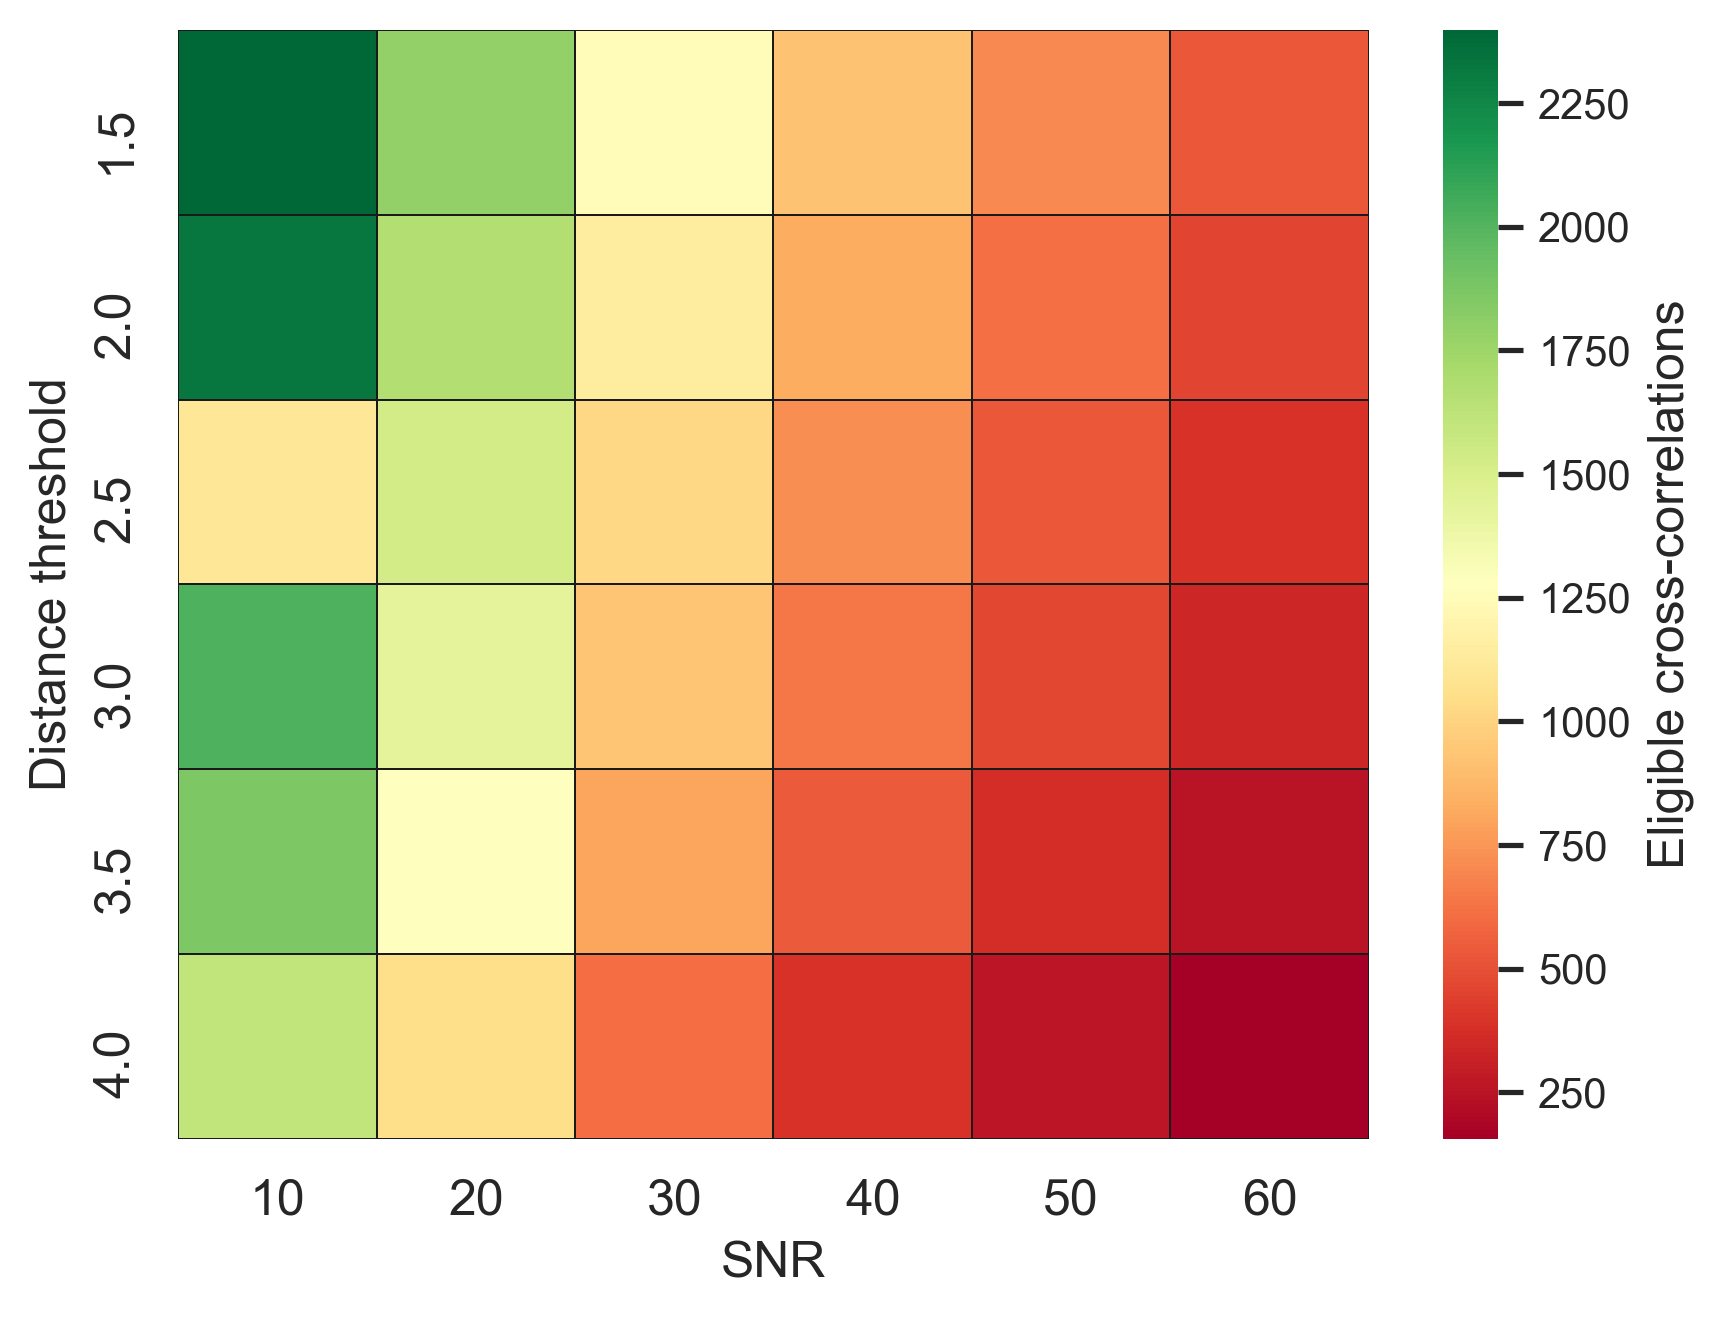

In [4]:
dir_ClockDrifts = "/Users/localadmin/Dropbox/GitHub/testing_ocloc/clock_drifts/"
column_headers_SNR = [10, 20, 30, 40, 50, 60]
row_headers_dist_trh = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
matrix = []
for snr_trh in column_headers_SNR:
    column = []
    for dist_trh in row_headers_dist_trh:
        iteration = "snr_trh_" + str(snr_trh) + "__dist_trh_" + str(dist_trh)
        file_name = "ClockDrift_"+iteration+".obj"
        path_2_clockdrift = os.path.join(dir_ClockDrifts, file_name)
        with open(path_2_clockdrift, 'rb') as f:
            cd = pickle.load(f)       
        correlations = [c for c in cd.correlations if not np.isnan(c.t_app[-1])]
        column.append(len(correlations))
    matrix.append(column)

ocloc.plot_matrix(matrix, column_headers_SNR, row_headers_dist_trh, 
                    xlabel="SNR", ylabel="Distance threshold", 
                    cmap_title="Eligible cross-correlations")

In [ ]:
for snr_trh in [10, 20, 30]:
    for dist_trh in [1.5, 2.0, 2.5, 3.0, 3.5, 4.0]:
    
        weighted_vals_all_stations, lstsq_vals_all_stations = [], []
        iteration = "snr_trh_" + str(snr_trh) + "__dist_trh_" + str(dist_trh)
        fig  = plt.figure(figsize=(6,3), dpi=200) #, sharex='col', sharey='col')
        for station in cd.stations:
            if not station.needs_correction:
                continue
            sta = station.code

            lstsq_vals = results["lstsq a " + sta + iteration]
            weighted_vals = results["weighted a " + sta + iteration]
            if len(lstsq_vals) == 0 or len(weighted_vals) == 0:
                continue
            mean_values = mean(lstsq_vals)
            lstsq_vals = [val - mean_values for val in lstsq_vals]
            for val in lstsq_vals:
                lstsq_vals_all_stations.append(val)

            
            mean_values = mean(weighted_vals)
            weighted_vals = [val - mean_values for val in weighted_vals]

            for val in weighted_vals:
                weighted_vals_all_stations.append(val)
    
        sns.histplot(data=weighted_vals_all_stations, binwidth=9**-4, 
                     color="r", label="weighted",kde=True)
        sns.histplot(data=lstsq_vals_all_stations, binwidth=9**-4, 
                     alpha=0.5, label="lstsq",kde=True)
        plt.title("a values (-mean) of all stations \n SNR: " 
                  +str(snr_trh) + " dist_thr: " 
                  + str(dist_trh))
        plt.legend()
        filename_ = (sta + "snr" + str(snr_trh) +
                     "dist_trh" + str(dist_trh) + ".png")
        plt.ylabel("Frequency")
        plt.xlabel("$a_{{{}}}^*$".format("all stations"))
        #plt.savefig("figures_comparing_inverse_strategies/" + filename_)
        plt.show()

## snr_trh
[10, 20, 30]
## dist_trh
[1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

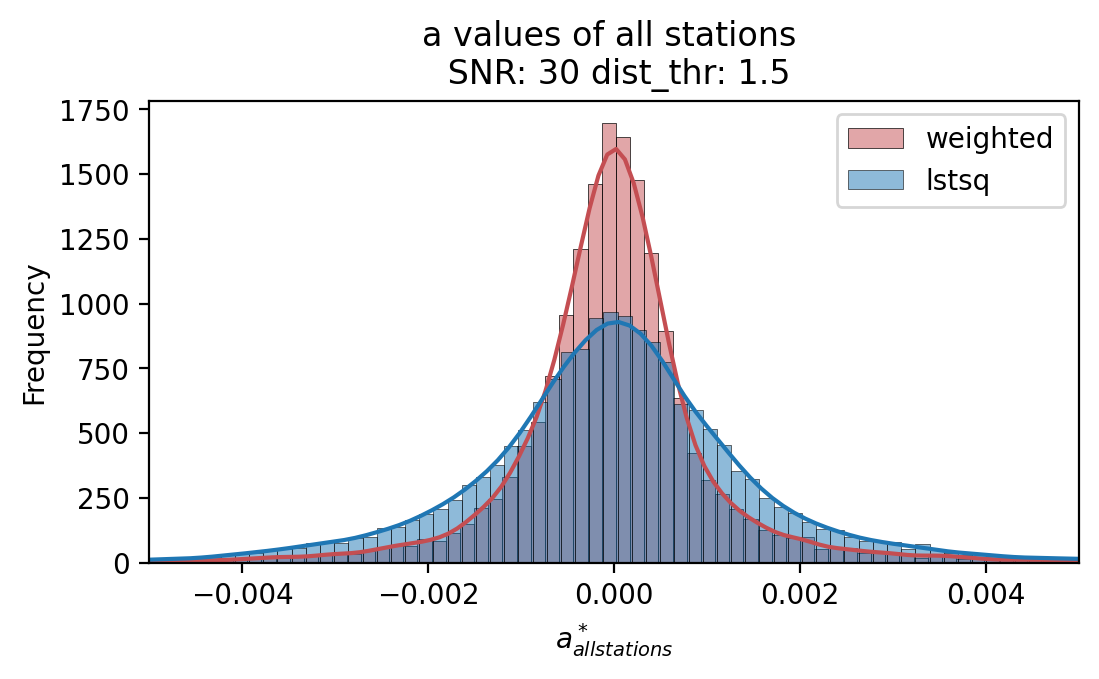

In [43]:
snr_trh = 30
dist_trh = 1.5
    
weighted_vals_all_stations, lstsq_vals_all_stations = [], []
iteration = "snr_trh_" + str(snr_trh) + "__dist_trh_" + str(dist_trh)
fig  = plt.figure(figsize=(6,3), dpi=200) #, sharex='col', sharey='col')
for station in cd.stations:
    if not station.needs_correction:
        continue
    sta = station.code

    lstsq_vals = results["lstsq a " + sta + iteration]
    weighted_vals = results["weighted a " + sta + iteration]
    if len(lstsq_vals) == 0 or len(weighted_vals) == 0:
        continue
    mean_values = mean(lstsq_vals)
    lstsq_vals = [val - mean_values for val in lstsq_vals]
    for val in lstsq_vals:
        lstsq_vals_all_stations.append(val)

    
    mean_values = mean(weighted_vals)
    weighted_vals = [val - mean_values for val in weighted_vals]

    for val in weighted_vals:
        weighted_vals_all_stations.append(val)

sns.histplot(data=weighted_vals_all_stations, binwidth=9**-4, 
                color="r", label="weighted",kde=True)
sns.histplot(data=lstsq_vals_all_stations, binwidth=9**-4, 
                alpha=0.5, label="lstsq",kde=True)
plt.title("a values of all stations \n SNR: " 
            +str(snr_trh) + " dist_thr: " 
            + str(dist_trh))
plt.legend()
filename_ = (sta + "snr" + str(snr_trh) +
                "dist_trh" + str(dist_trh) + ".png")
plt.ylabel("Frequency")
plt.xlabel("$a_{{{}}}^*$".format("all stations"))
plt.xlim(-0.005, 0.005)
#plt.savefig("figures_comparing_inverse_strategies/" + filename_)
plt.show()
    

# Confidence intervals
To calculate a 95% confidence interval for a population mean, we use the
following steps:

1. Find the sample mean (x̄) and sample standard deviation (s) of your data.

2. Determine the appropriate z-score for a 95% confidence level. For a two-tailed test with a 95% confidence level, the z-score is 1.96.

3. Calculate the margin of error (ME) by multiplying the z-score by the standard deviation of the sample. ME = z*s/√n

4. Calculate the lower and upper bounds of the interval by adding and subtracting the margin of error from the sample mean.

Interval = x̄ + ME or x̄ - ME

Lower bound = x̄ - ME

Upper bound = x̄ + ME

5. The interval [lower bound, upper bound] is your 95% confidence interval for the population mean.

Note: It is important to have a large sample size (n>30) and a normal distribution of the sample data for this method to be valid.

Here is the function:

In [39]:
def confidence_interval_95(data):
    """Calculate the 95% confidence interval of a list of data points.

    Args:
        data (list): A list of data points.

    Returns:
        tuple: The lower and upper bounds of the 95% confidence interval.
    """
    import numpy as np
    from scipy.stats import norm
    # calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # calculate the z-score for a 95% confidence level
    z = norm.ppf(0.975) 

    # calculate the margin of error
    margin_error = z * (std_dev / np.sqrt(len(data)))

    # calculate the lower and upper bounds of the interval
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error

    # print the results
    print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")
    return lower_bound, upper_bound

In [38]:
confidence_interval_95(weighted_vals_all_stations)

95% Confidence Interval: [-1.6943582245056294e-05, 1.694358224505628e-05]


(-1.6943582245056294e-05, 1.694358224505628e-05)

lstsq -2.33678643984e-05 2.33678643984e-05
weighted lstsq -1.69440806077e-05 1.69440806077e-05


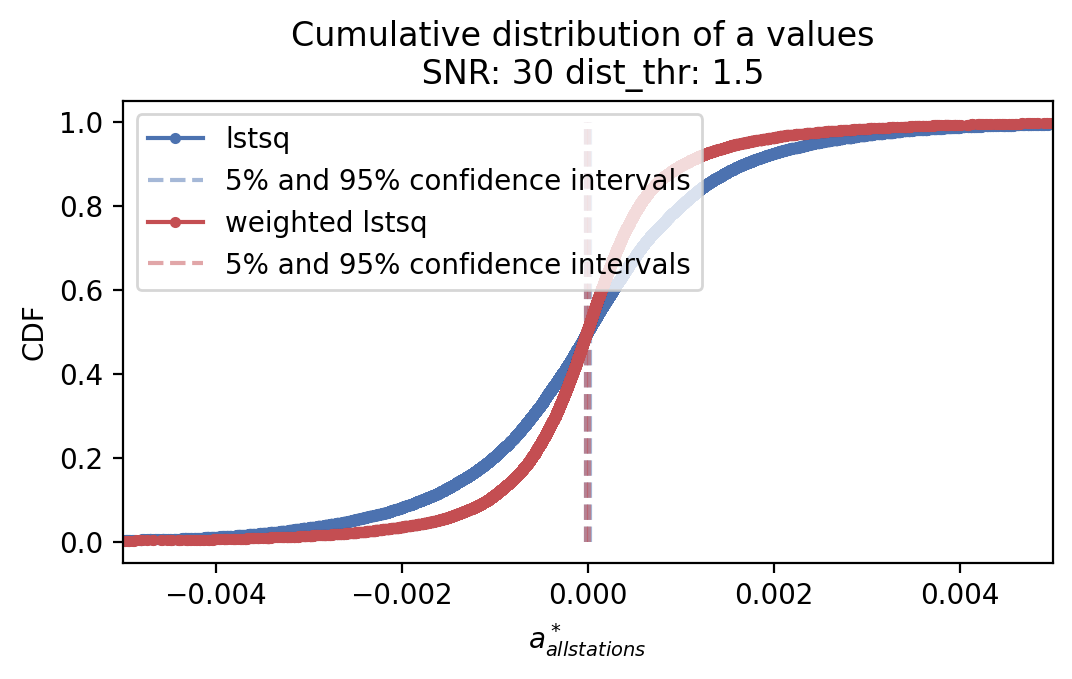

In [44]:
# function to plot the cumulative distribution of a list and 5% and 95%
# confidence intervals.
def plot_cumulative_distribution_confidence_intervals(lst, label, color):
    """
    plot the cumulative distribution of a list and 5% and 95% confidence intervals.

    Parameters
    ----------
    lst : list
        list of values.
    label : str
        label for the plot.
    color : str
        color for the plot.

    Returns
    -------
    None.

    """
    from scipy import stats as st
    lst = np.sort(lst)
    n = len(lst)
    y = np.arange(1, n+1) / n
    C05, C95 = st.norm.interval(alpha=0.95, loc=np.mean(lst), scale=st.sem(lst))
    print(label, C05, C95)
    plt.plot(lst, y, marker='.', linestyle='-', label=label, color=color)
    plt.plot([C05, C05], [0, 1], 
             color=color, linestyle="--", alpha=0.5)
    plt.plot([C95, C95], [0, 1], 
             color=color, linestyle="--", alpha=0.5, 
             label="5% and 95% confidence intervals")
    plt.xlabel("$a_{{{}}}^*$".format("all stations"))
    plt.ylabel("CDF")
    plt.title("Cumulative distribution of a values \n SNR: "
              + str(snr_trh) + " dist_thr: " + str(dist_trh))
    plt.xlim(-0.005, 0.005)

plt.figure(figsize=(6,3), dpi=200)
plot_cumulative_distribution_confidence_intervals(lstsq_vals_all_stations,
                                                  "lstsq", "b")
plot_cumulative_distribution_confidence_intervals(weighted_vals_all_stations,
                                                  "weighted lstsq", "r")
plt.legend(loc='upper left')
plt.show()

lstsq -0.00252886864887 0.00248736232844
weighted lstsq -0.00161583544892 0.00170180739943


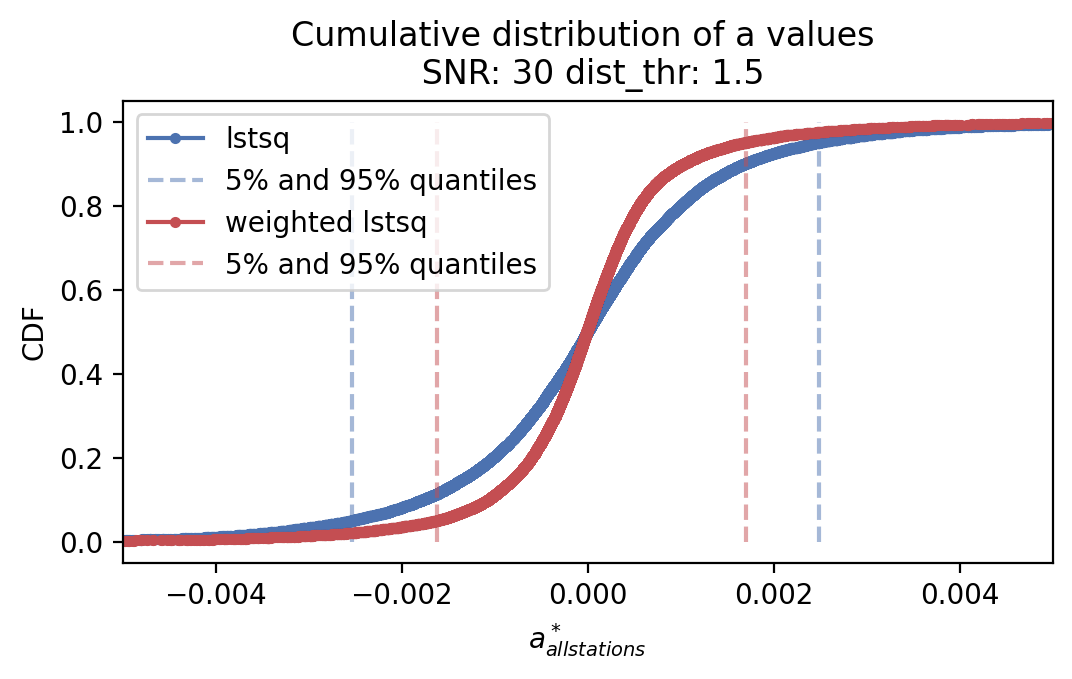

In [45]:
# function to plot the cumulative distribution of a list and 5% and 95%
# quantiles.
def plot_cumulative_distribution_quantiles(lst, label, color):
    """
    plot the cumulative distribution of a list and 5% and 95% quantiles.

    Parameters
    ----------
    lst : list
        list of values.
    label : str
        label for the plot.
    color : str
        color for the plot.

    Returns
    -------
    None.

    """
    lst = np.sort(lst)
    n = len(lst)
    y = np.arange(1, n+1) / n
    C05 = np.quantile(lst, 0.05)
    C95 = np.quantile(lst, 0.95)
    print(label, C05, C95)
    plt.plot(lst, y, marker='.', linestyle='-', label=label, color=color)
    plt.plot([C05, C05], [0, 1], 
             color=color, linestyle="--", alpha=0.5)
    plt.plot([C95, C95], [0, 1], 
             color=color, linestyle="--", alpha=0.5, 
             label="5% and 95% quantiles")
    plt.xlabel("$a_{{{}}}^*$".format("all stations"))
    plt.ylabel("CDF")
    plt.title("Cumulative distribution of a values \n SNR: "
              + str(snr_trh) + " dist_thr: " + str(dist_trh))
    plt.xlim(-0.005, 0.005)

plt.figure(figsize=(6,3), dpi=200)
plot_cumulative_distribution_quantiles(lstsq_vals_all_stations,
                                                    "lstsq", "b")
plot_cumulative_distribution_quantiles(weighted_vals_all_stations,
                                                    "weighted lstsq", "r")
plt.legend(loc='upper left')
plt.show()



# SNR 40

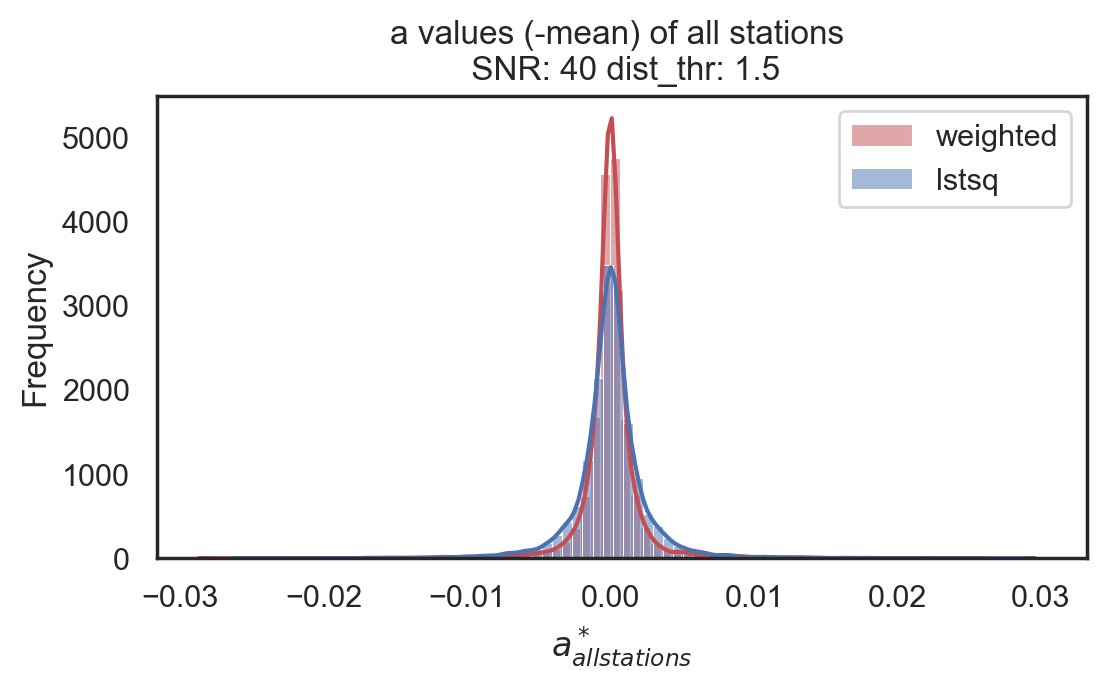

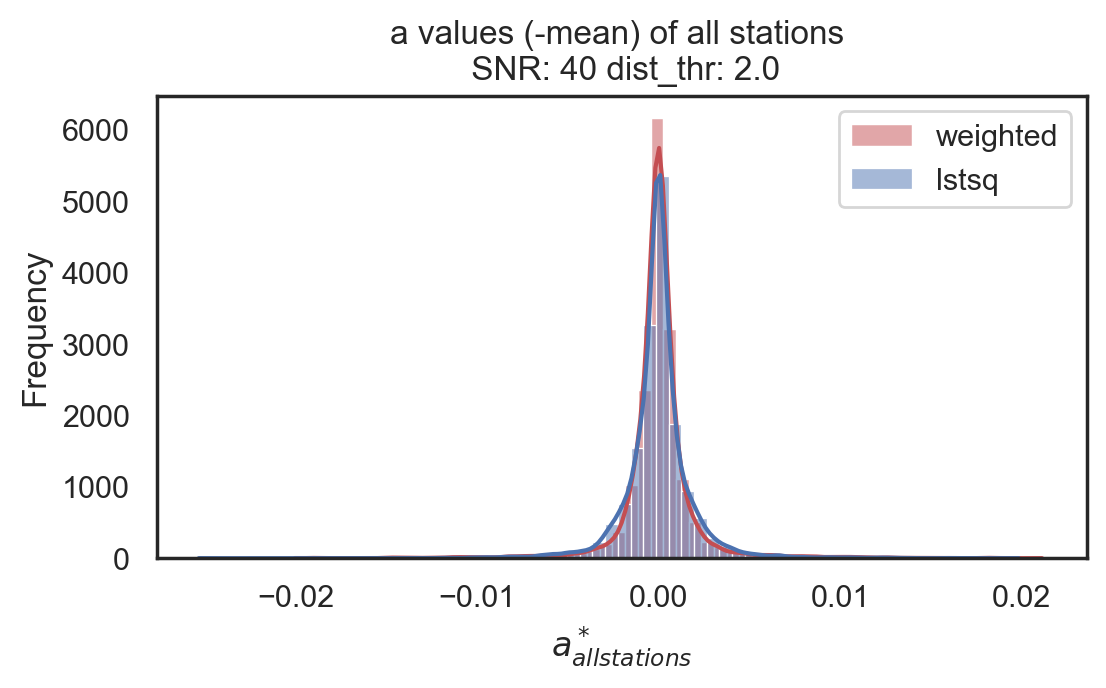

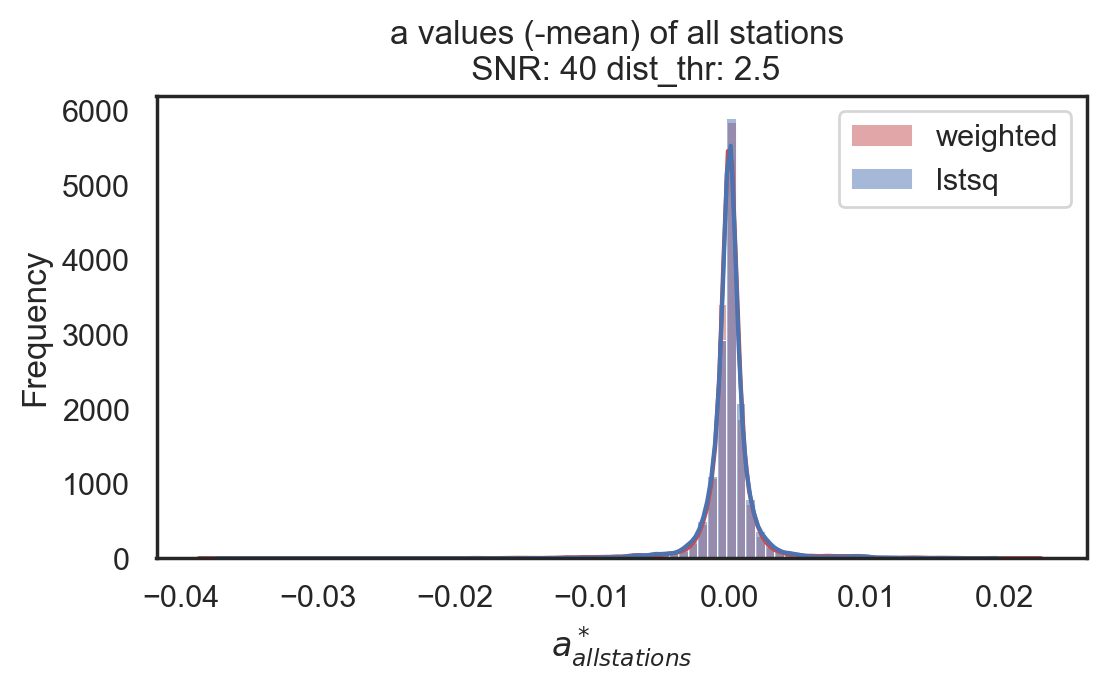

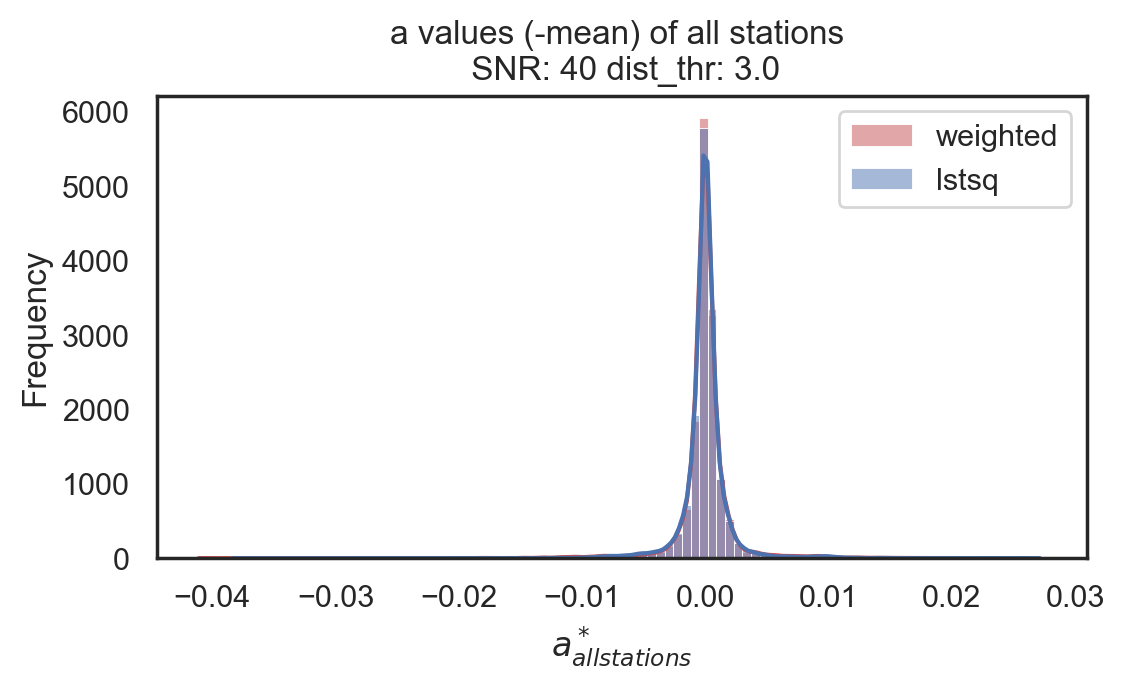

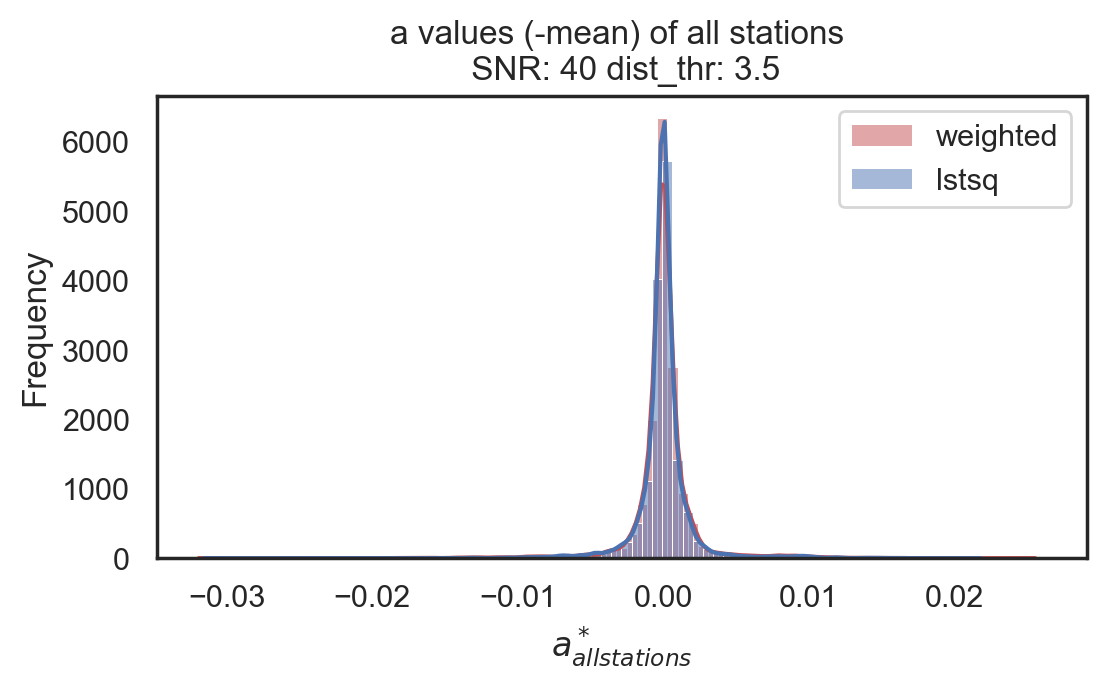

In [4]:
for snr_trh in [40]: # 50, 60]:
    for dist_trh in [1.5, 2.0, 2.5, 3.0, 3.5]:#, 4.0]:
    
        weighted_vals_all_stations, lstsq_vals_all_stations = [], []
        iteration = "snr_trh_" + str(snr_trh) + "__dist_trh_" + str(dist_trh)
        fig  = plt.figure(figsize=(6,3), dpi=200) #, sharex='col', sharey='col')
        for station in cd.stations:
            if not station.needs_correction:
                continue
            sta = station.code

            lstsq_vals = results["lstsq a " + sta + iteration]
            weighted_vals = results["weighted a " + sta + iteration]
            if len(lstsq_vals) == 0 or len(weighted_vals) == 0:
                continue
            mean_values = mean(lstsq_vals)
            lstsq_vals = [val - mean_values for val in lstsq_vals]
            for val in lstsq_vals:
                lstsq_vals_all_stations.append(val)

            
            mean_values = mean(weighted_vals)
            weighted_vals = [val - mean_values for val in weighted_vals]

            for val in weighted_vals:
                weighted_vals_all_stations.append(val)

        binwidth = 7*10**-4
        #binwidth = 9**-3
        #binwidth = 3**-3
        sns.histplot(data=weighted_vals_all_stations, binwidth=binwidth, 
                     color="r", label="weighted",kde=True)
        sns.histplot(data=lstsq_vals_all_stations, binwidth=binwidth, 
                     alpha=0.5, label="lstsq",kde=True)
        plt.title("a values (-mean) of all stations \n SNR: " 
                  +str(snr_trh) + " dist_thr: " 
                  + str(dist_trh))
        plt.legend()
        filename_ = (sta + "snr" + str(snr_trh) +
                     "dist_trh" + str(dist_trh) + ".png")
        plt.ylabel("Frequency")
        plt.xlabel("$a_{{{}}}^*$".format("all stations"))
        #plt.savefig("figures_comparing_inverse_strategies/" + filename_)
        plt.show()

# Same for b values

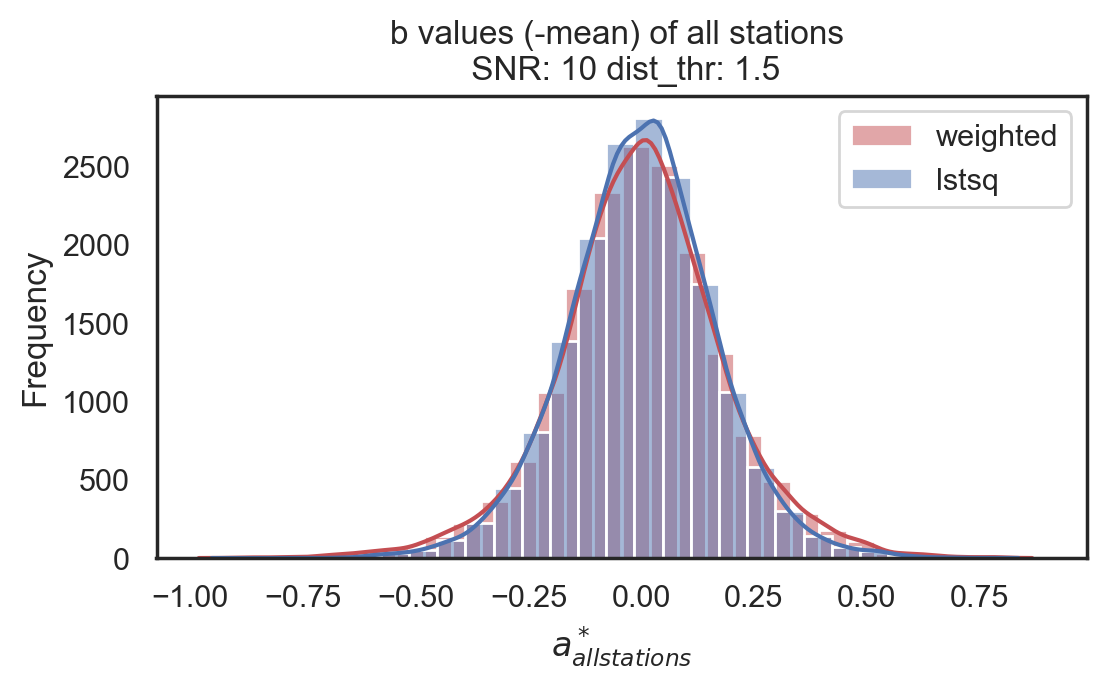

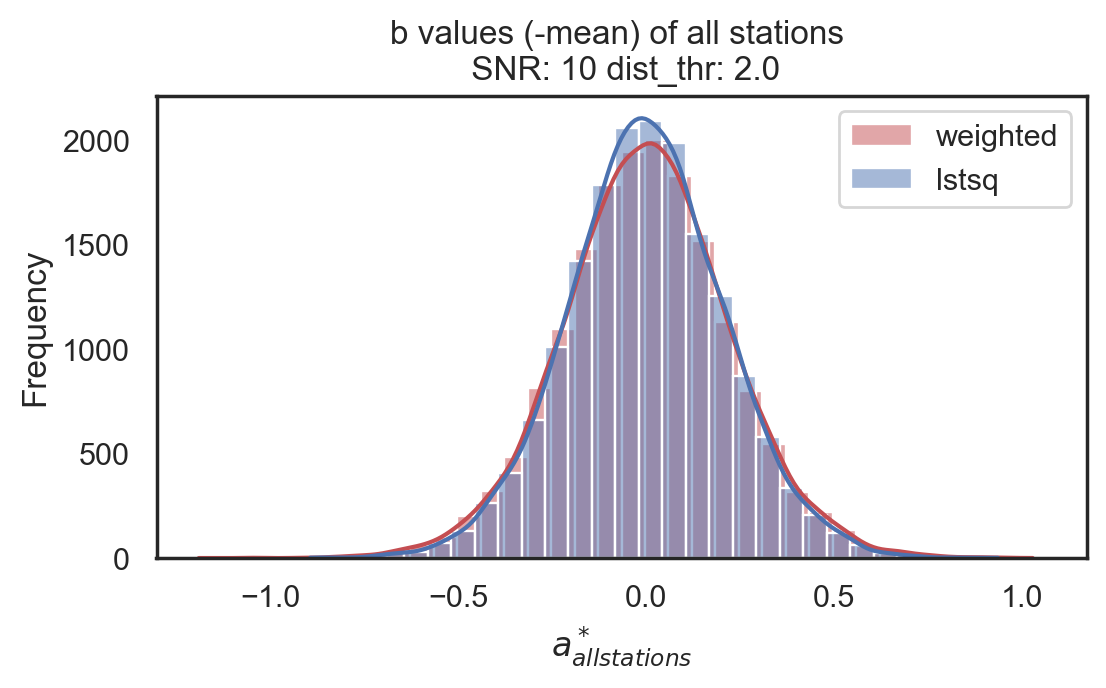

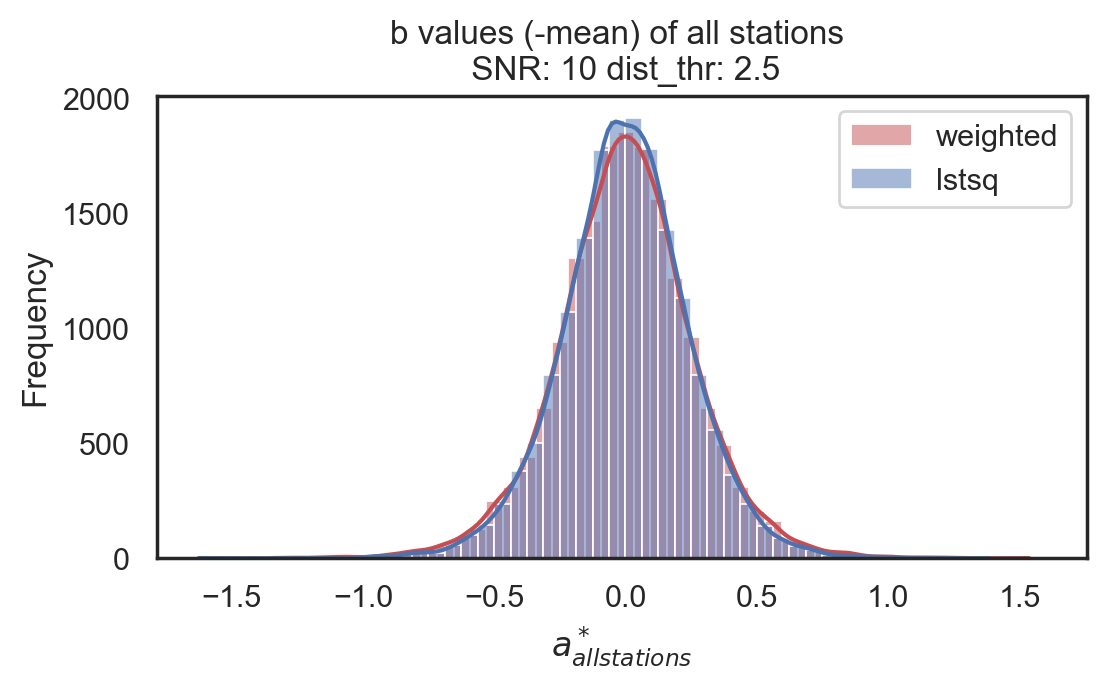

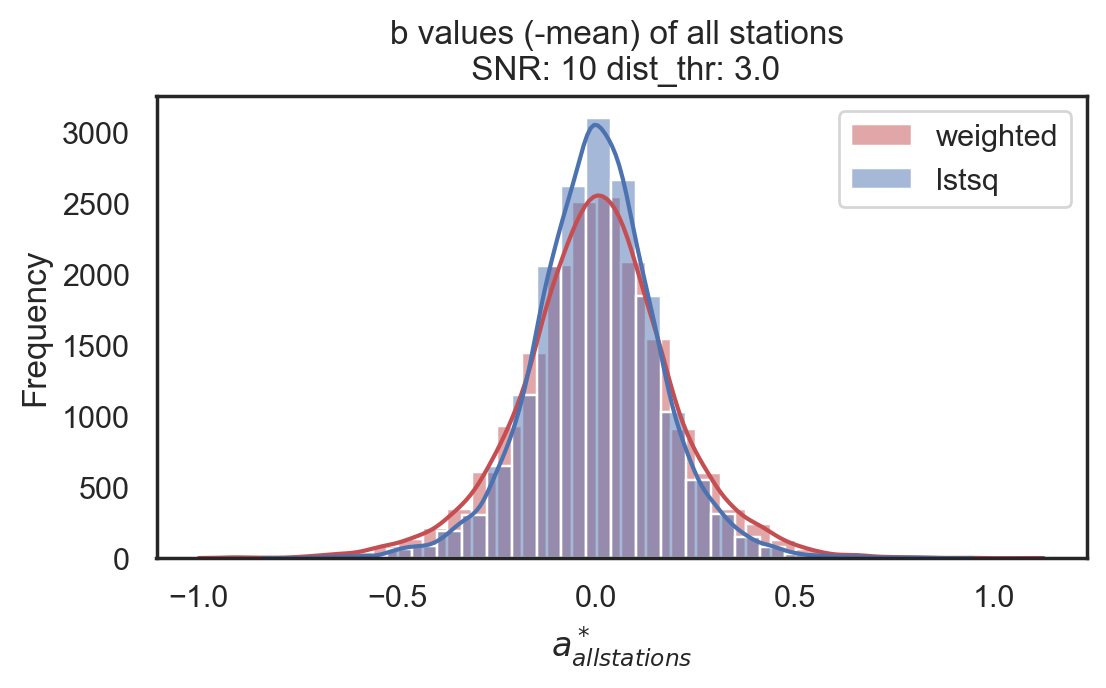

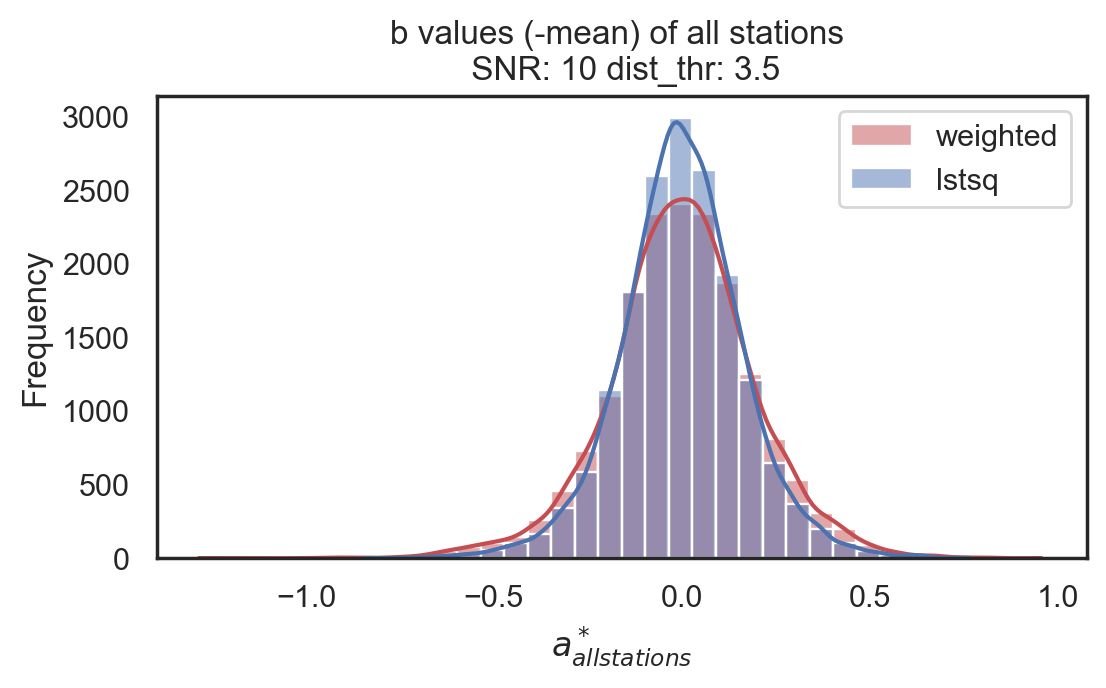

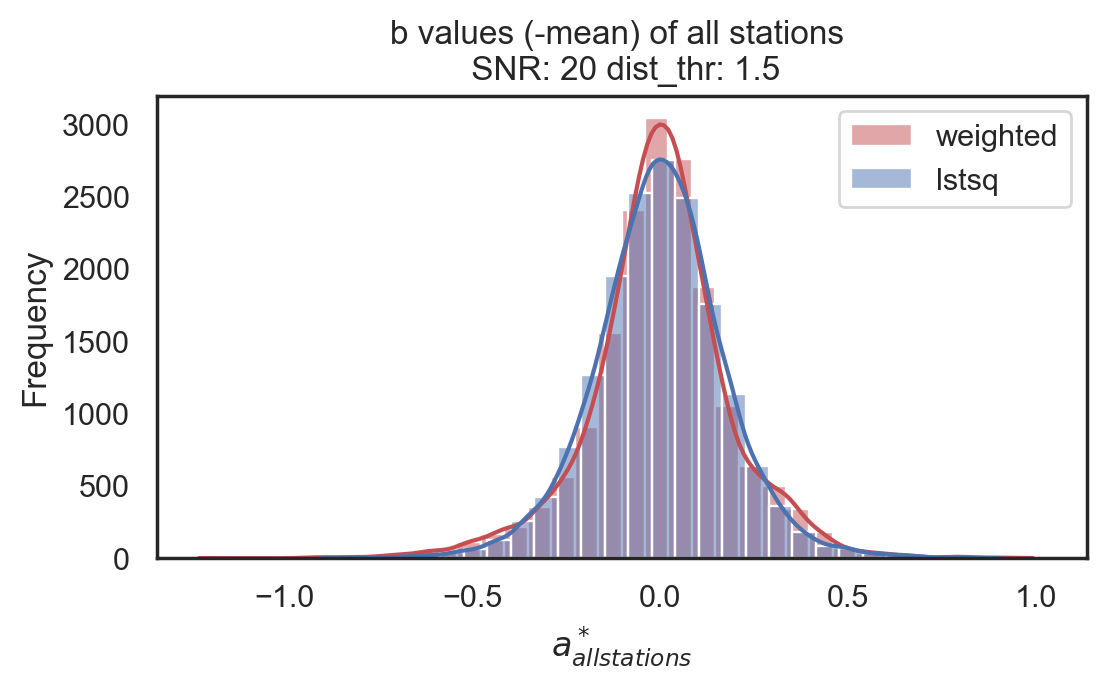

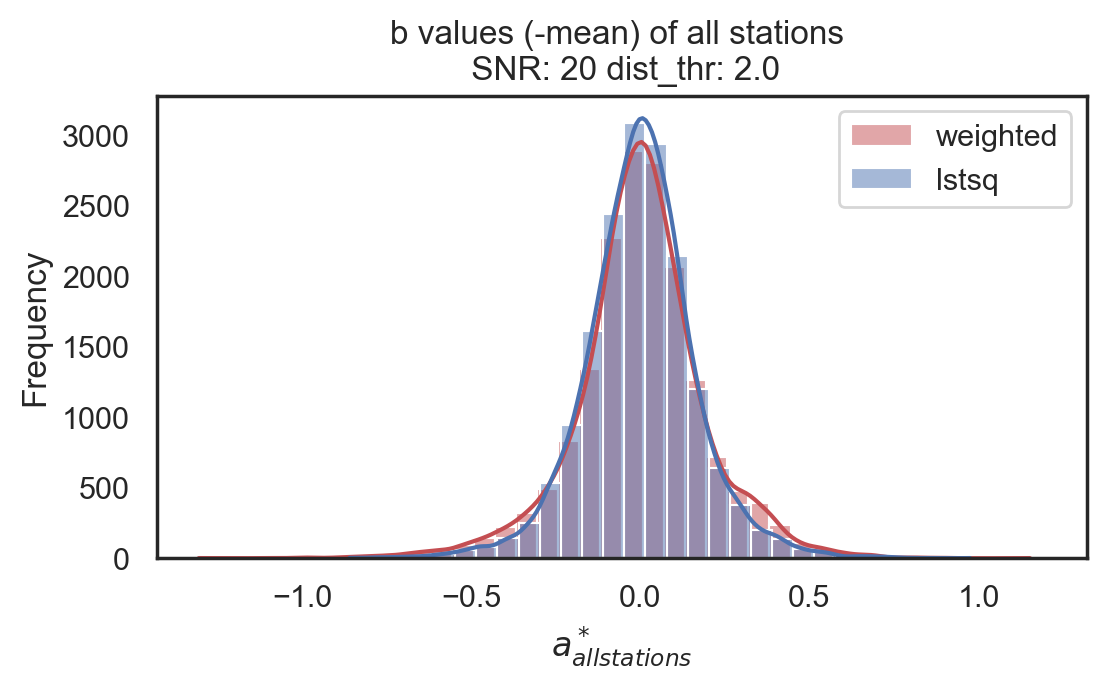

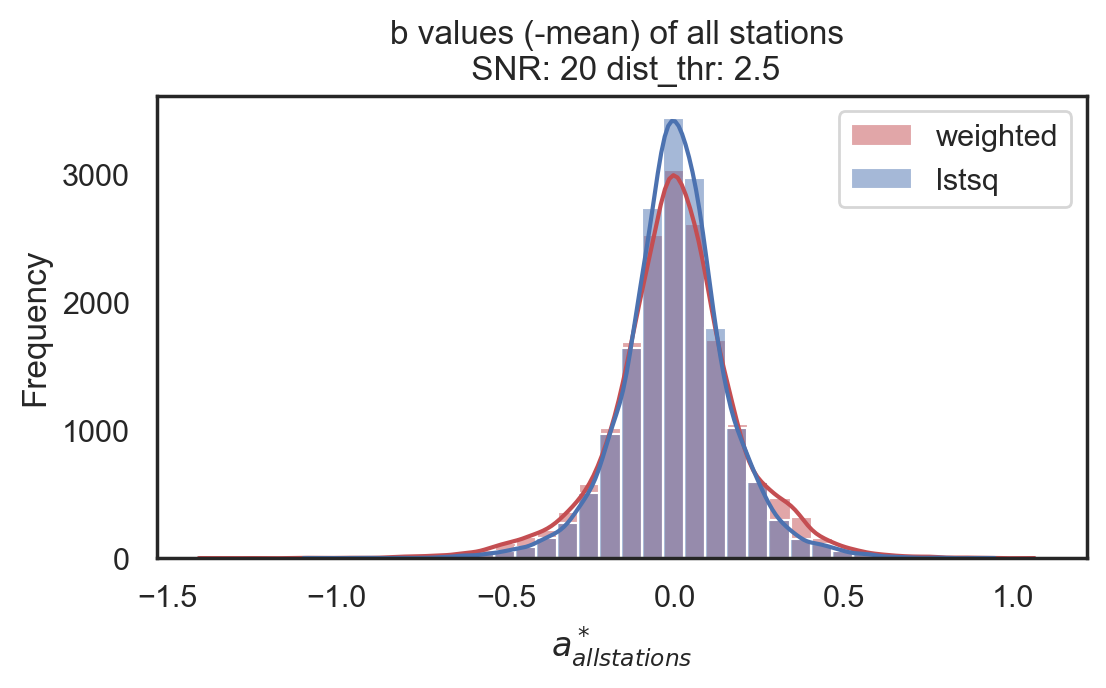

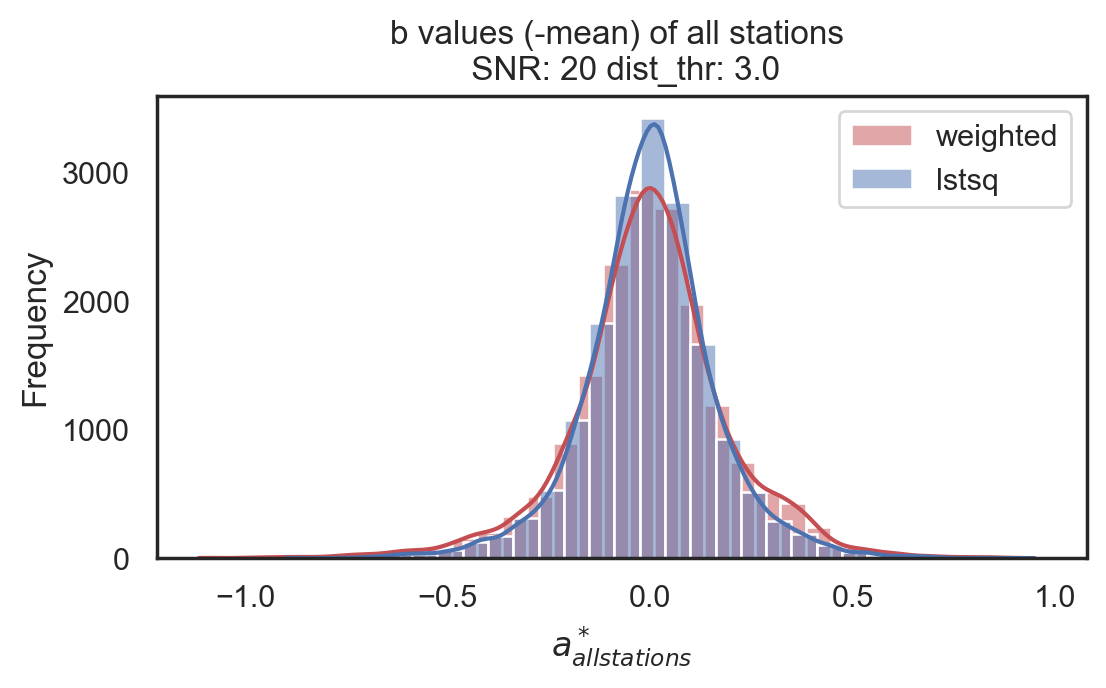

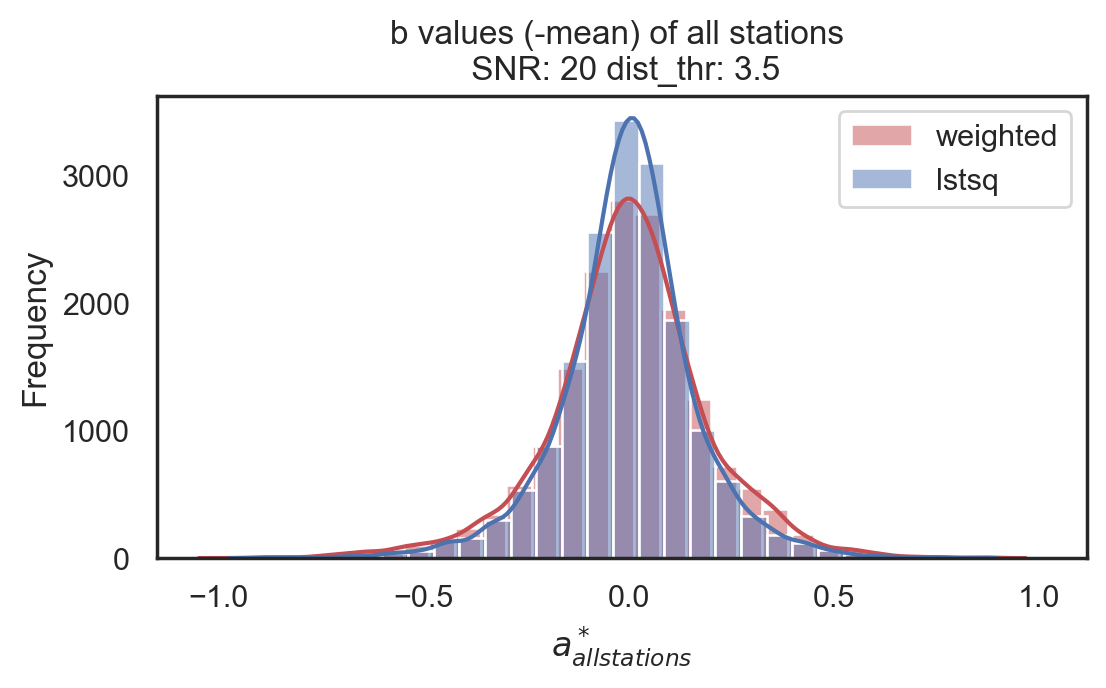

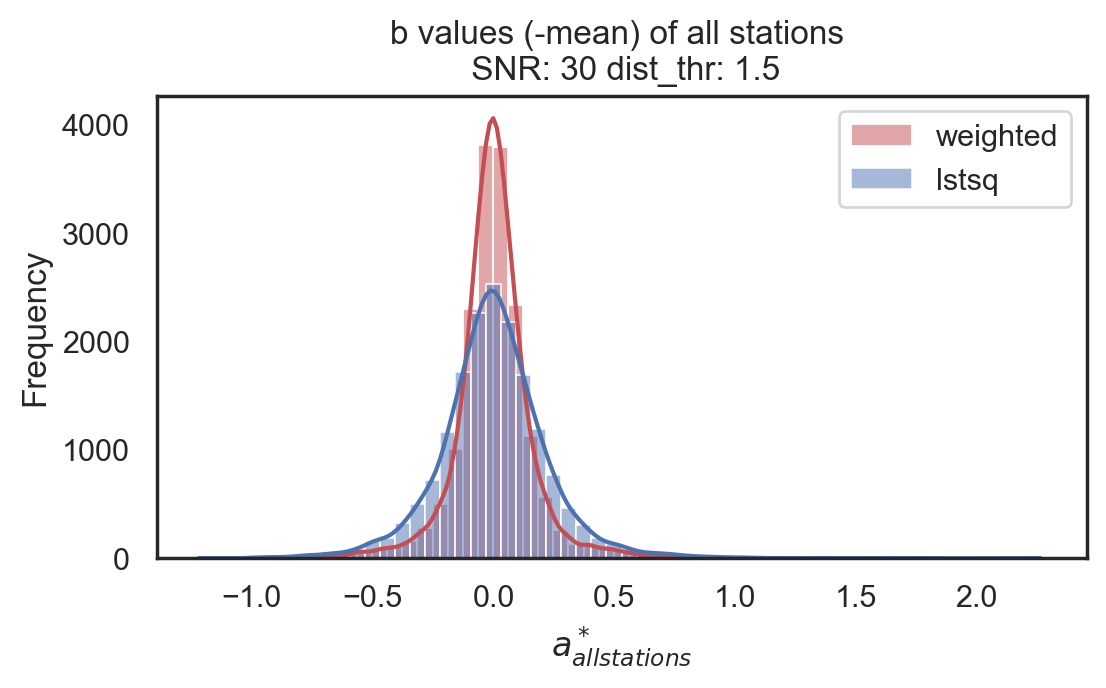

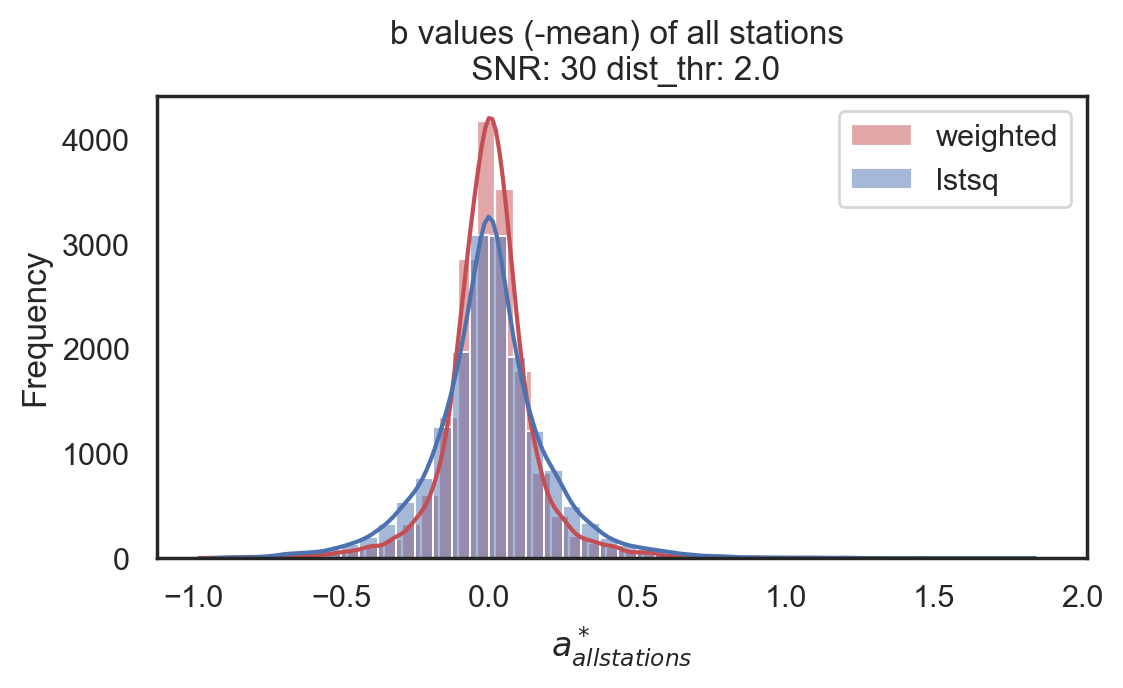

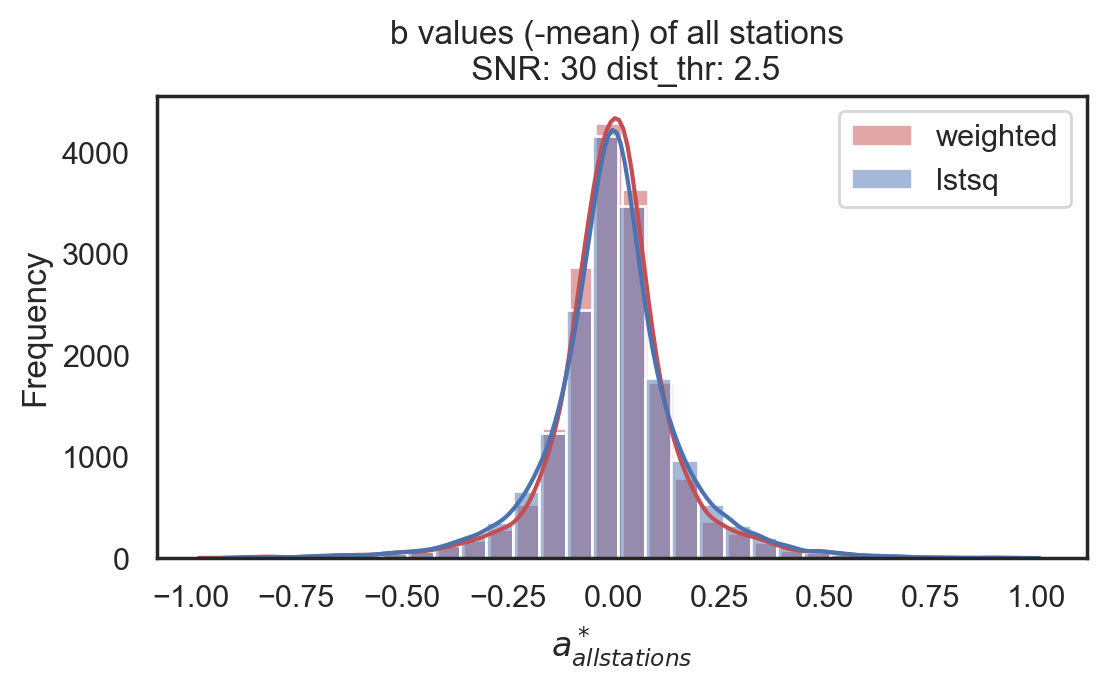

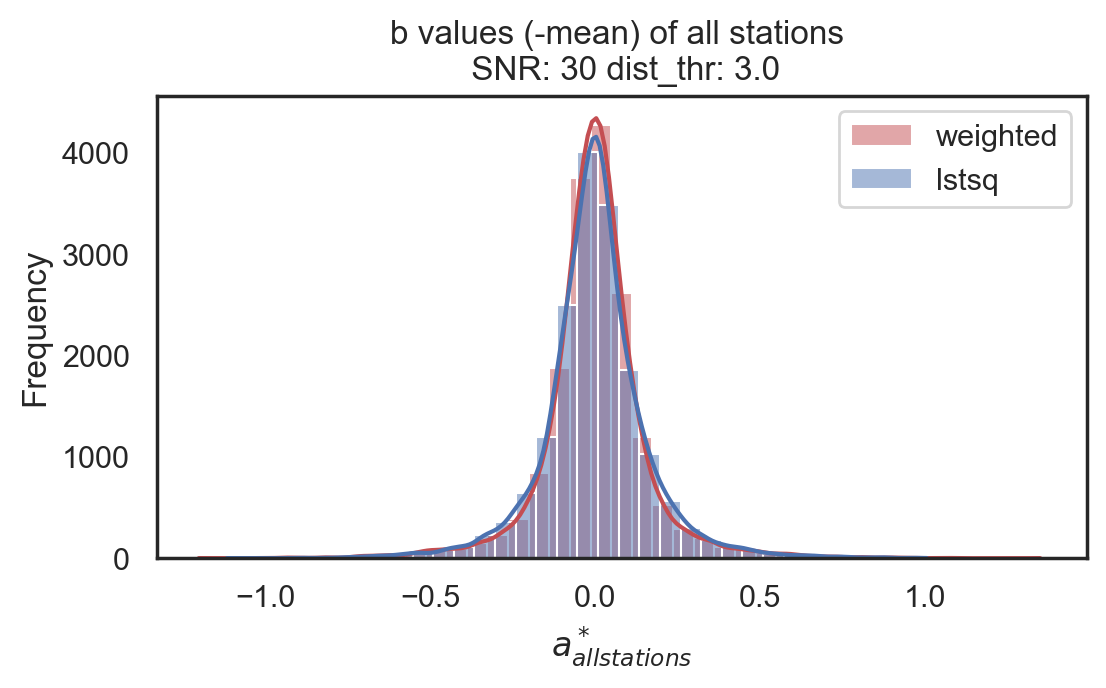

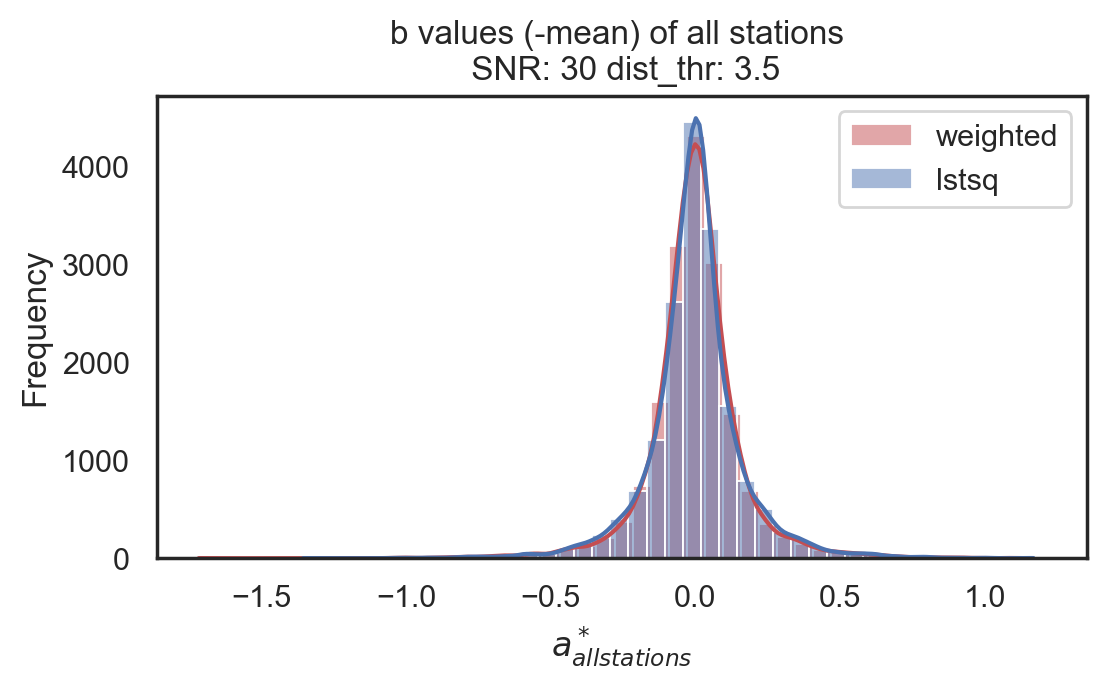

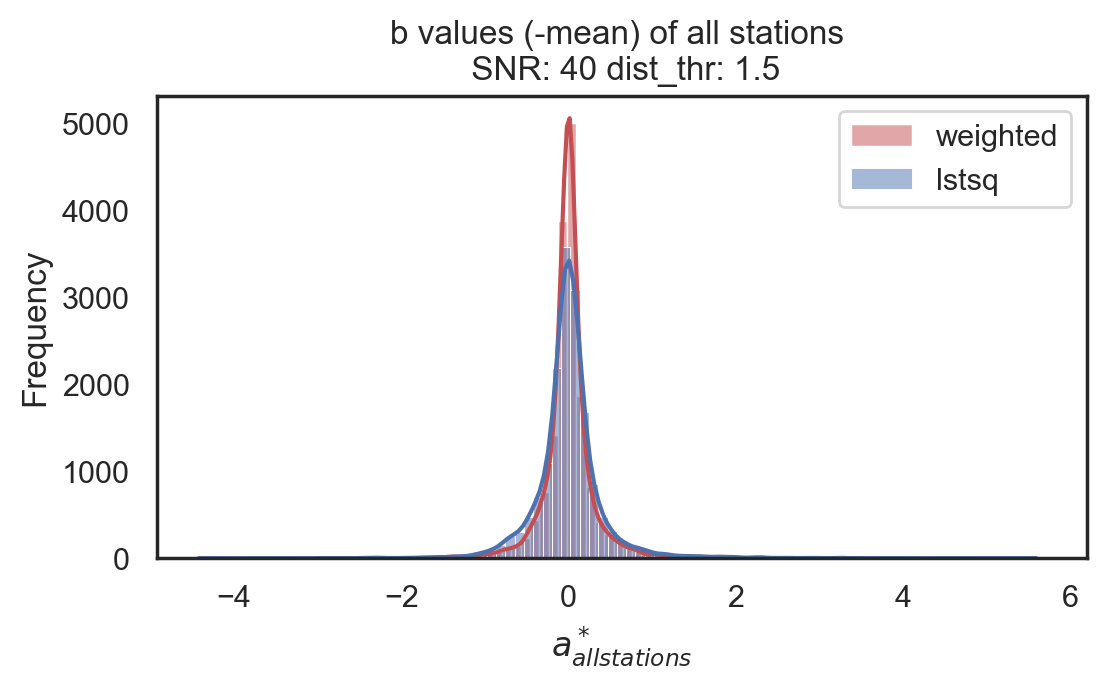

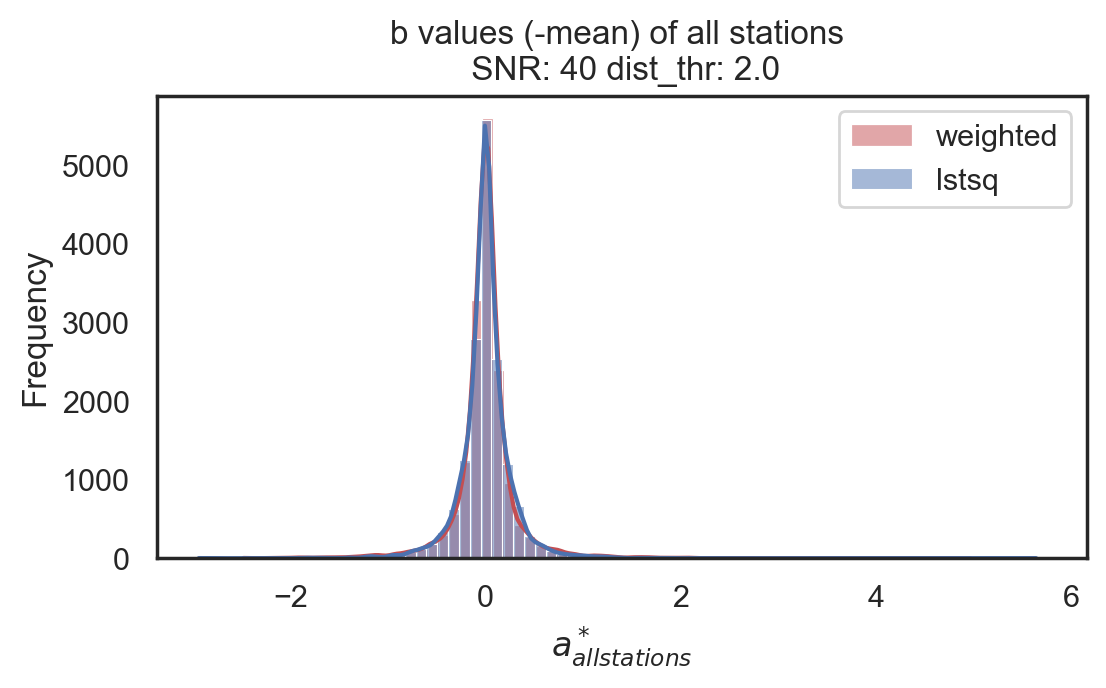

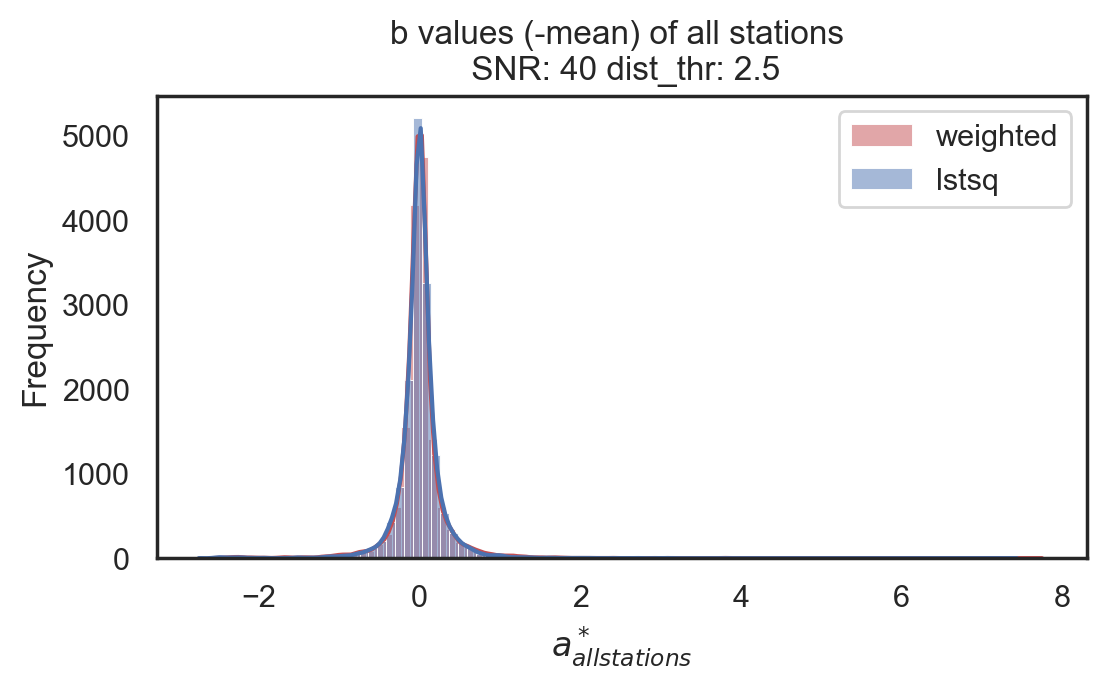

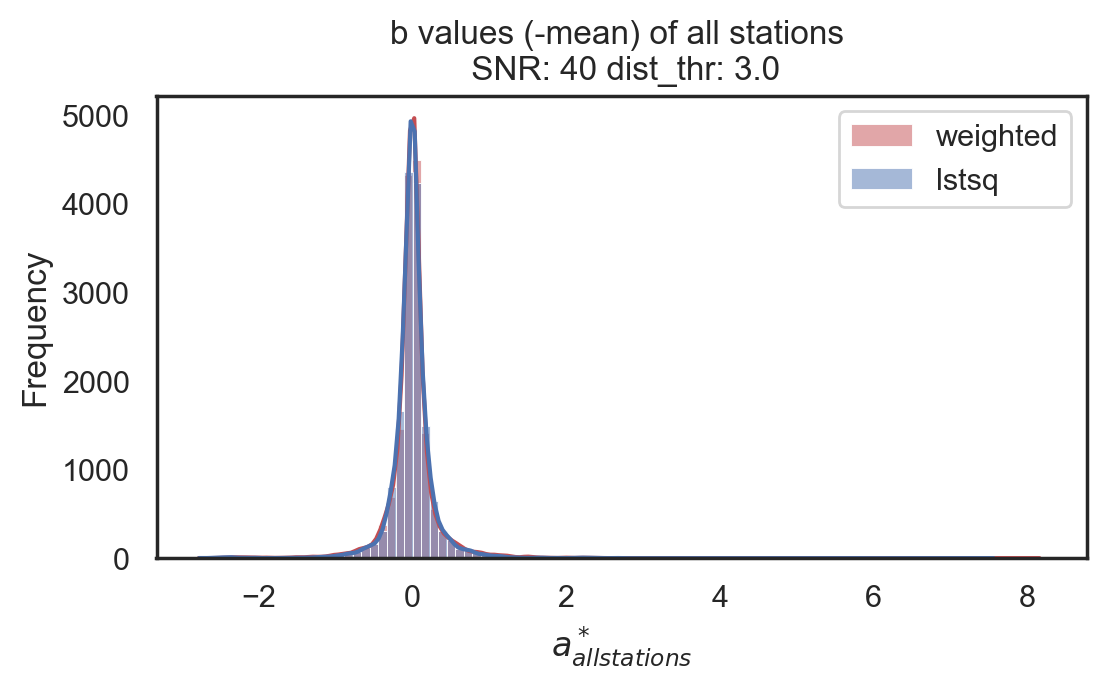

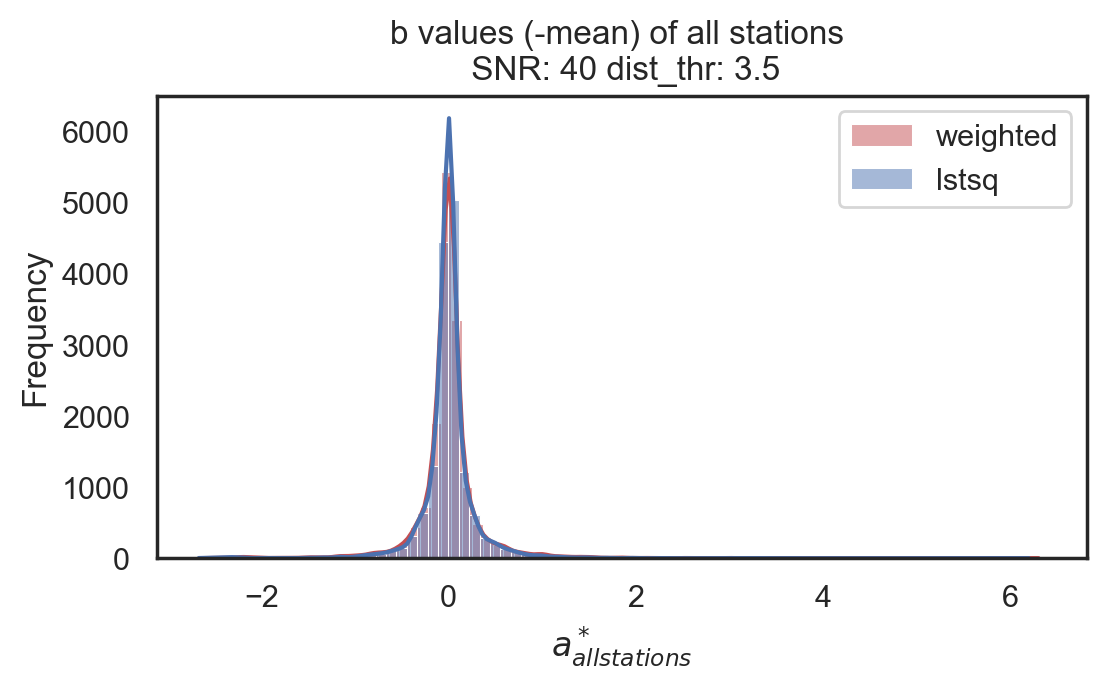

In [5]:
for snr_trh in [10, 20, 30, 40]:
    for dist_trh in [1.5, 2.0, 2.5, 3.0, 3.5]: #, 4.0]:
    
        weighted_vals_all_stations, lstsq_vals_all_stations = [], []
        iteration = "snr_trh_" + str(snr_trh) + "__dist_trh_" + str(dist_trh)
        fig  = plt.figure(figsize=(6,3), dpi=200) #, sharex='col', sharey='col')
        for station in cd.stations:
            if not station.needs_correction:
                continue
            sta = station.code

            lstsq_vals = results["lstsq b " + sta + iteration]
            weighted_vals = results["weighted b " + sta + iteration]
            if len(lstsq_vals) == 0 or len(weighted_vals) == 0:
                continue
            mean_values = mean(lstsq_vals)
            lstsq_vals = [val - mean_values for val in lstsq_vals]
            for val in lstsq_vals:
                lstsq_vals_all_stations.append(val)

            
            mean_values = mean(weighted_vals)
            weighted_vals = [val - mean_values for val in weighted_vals]

            for val in weighted_vals:
                weighted_vals_all_stations.append(val)
        binwidth = 4**-2 if snr_trh != 40 else 3**-2 
        sns.histplot(data=weighted_vals_all_stations, binwidth=binwidth, 
                     color="r", label="weighted",kde=True)
        sns.histplot(data=lstsq_vals_all_stations, binwidth=binwidth, 
                     alpha=0.5, label="lstsq",kde=True)
        plt.title("b values (-mean) of all stations \n SNR: " 
                  +str(snr_trh) + " dist_thr: " 
                  + str(dist_trh))
        plt.legend()
        filename_ = (sta + "snr" + str(snr_trh) +
                     "dist_trh" + str(dist_trh) + ".png")
        plt.ylabel("Frequency")
        plt.xlabel("$a_{{{}}}^*$".format("all stations"))
        #plt.savefig("figures_comparing_inverse_strategies/" + filename_)
        plt.show()
        